In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from src.utils import *

## Preprocessing 

In [2]:
df = pd.read_excel('data.xlsx', engine='openpyxl')
df.head(20)

,ctx,codice_dm,lista_id,pers_sesso,pers_eta_ingresso_in_lista,diagnosi,diagnosi_specifica,eltr,lista_ingresso_data,tot_tx_organo,...,donatore_HBeAg,donatore_HBeAb,donatore_antiCoreTot,donatore_hbv_dna,donatore_hcv_rna,donatore_steatosiMacro,donatore_biopsiaEpatica,donatore_biopsiaRenale,donatore_livelloRischioPreLT,donatore_variazioneLivello
0,BOLOGNA,12898,20412,M,54,Altra epatopatia,NaN,NaN,2004-03-10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOLOGNA,12908,20422,M,64,Cirrosi postnecrotica da HCV,NaN,NaN,2003-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BOLOGNA,12909,20423,M,56,Cirrosi criptogenetica o idiopatica,NaN,D11 : Cirrhosis-Cryptogenic (unknown) cirrhosis,2002-07-18,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOLOGNA,12913,20428,M,51,Cirrosi di Laennec (post-alcolica),NaN,NaN,2003-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOLOGNA,12935,20450,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-01-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BOLOGNA,12937,20452,F,63,Epatocarcinoma associato a cirrosi,NaN,NaN,2003-12-29,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BOLOGNA,12939,20454,F,55,Cirrosi biliare primitiva,NaN,NaN,2003-10-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BOLOGNA,12958,20473,M,63,Cirrosi postnecrotica da HCV,NaN,NaN,2003-07-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BOLOGNA,12961,20476,M,62,Cirrosi postnecrotica da HBV HbsAg positiva,NaN,NaN,2003-07-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BOLOGNA,12964,20479,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-02-23,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['diagnosi'].value_counts()

Epatocarcinoma associato a cirrosi                                                              708
Cirrosi postnecrotica da HCV                                                                    425
Cirrosi di Laennec (post-alcolica)                                                              249
Ritrapianto/rigetto di trapianto epatico                                                         90
Cirrosi postnecrotica da HBV HbsAg positiva                                                      72
Cirrosi postnecrotica da coinfezione HBV + HDV                                                   67
Cirrosi criptogenetica o idiopatica                                                              64
Altra epatopatia                                                                                 58
Cirrosi di Laennec associata a cirrosi postnecrotica                                             52
Cirrosi biliare primitiva                                                                        48


In [4]:
missing_percent = {}
for column in df.columns:
    missing_percent[column] = df[column].isna().sum() / len(df)
for column in sorted(missing_percent, key=missing_percent.get, reverse=True):
    print('{}: {:.3f}'.format(column, missing_percent[column]))

Na: 1.000
fega_note: 0.999
donatore_diabete_insulinodipendente_desc: 0.999
donatore_bassaportata3_PAmin: 0.998
donatore_bassaportata3_data: 0.997
donatore_bassaportata3_ora: 0.997
donatore_bassaportata3_durata: 0.997
donatore_bassaportata3_PAmax: 0.997
donatore_bassaportata3_trattamento: 0.997
ISO2_tipo_super_urgenza: 0.997
donatore_bassaportata2_PAmin: 0.995
donatore_bassaportata2_PAmax: 0.993
donatore_bassaportata2_durata: 0.991
donatore_bassaportata2_ora: 0.990
donatore_bassaportata2_trattamento: 0.990
scheda48h_tipo_tx_effettivo_combinato: 0.989
donatore_biopsiaRenale: 0.989
donatore_bassaportata2_data: 0.988
donatore_note: 0.980
categoria_HCC: 0.977
diagnosi_specifica: 0.974
donatore_diabete_desc: 0.974
donatore_dislipidemie_desc: 0.970
trombosi_portale_note: 0.969
ISO2_Ecc. MELD: 0.969
donatore_bassaportata1_PAmin: 0.958
donatore_variazioneLivello: 0.954
tipo_combinato: 0.944
ric_eccezione_MELD_PELD: 0.944
donatore_bassaportata1_PAmax: 0.939
donatore_HBeAg: 0.939
donatore_bassapo

In [5]:
columns = ['BMI', 'MELD_base',
           'pers_sesso', 'ric_diabete',
           'ric_HCV', 'data_trapianto',
           'data_decesso', 'data_ultimo_agg_followup',
           'pers_eta_ingresso_in_lista', 'HCC',
           'trombosi_portale', 'ric_HBsAg',
           'UNOS', 'ric_HIV', 'lista_ingresso_data',
           'chirurgia_addom', 'iscriz_tx_comb', 
           'lista_uscita_data', 'causa_uscita'] 
           #'MELD_in_ingresso', 'MELD_in_uscita']

categories = ['pers_sesso', 'ric_diabete',
              'ric_HCV', 'HCC', 'trombosi_portale',
              'ric_HBsAg', 'UNOS', 'ric_HIV',
              'chirurgia_addom', 'iscriz_tx_comb']

# column that need to be explained: CHILD, UNOS, diagnosi, codice dm, causa_uscita

In [6]:
df = df[columns]
df = pd.get_dummies(df, columns=categories, drop_first=True)
df['deceased'] = np.zeros(len(df)) 
df['transplanted'] = np.zeros(len(df))
#df['ultimo_aggiornamento'] = df['data_decesso']

df.head(50)
# how do we handle patients in the list that do not have data_trapianto and data_decesso
# what does 'Non idonea clinicamente' mean?

,BMI,MELD_base,data_trapianto,data_decesso,data_ultimo_agg_followup,pers_eta_ingresso_in_lista,lista_ingresso_data,lista_uscita_data,causa_uscita,pers_sesso_M,...,trombosi_portale_SI,ric_HBsAg_SI,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,chirurgia_addom_SI,iscriz_tx_comb_SI,deceased,transplanted
0,25.16,8.0,2004-10-22,2013-08-01,NaT,54,2004-03-10,2004-10-22,TX nel centro di iscrizione,1,...,0,0,0,1,0,0,0,1,0.0,0.0
1,27.76,10.0,NaT,NaT,NaT,64,2003-12-02,2010-01-12,Non idoneo clinicamente,1,...,0,0,0,1,0,0,1,0,0.0,0.0
2,26.49,13.0,NaT,NaT,NaT,56,2002-07-18,2016-06-09,Uscito per miglioramento,1,...,0,0,0,1,0,0,0,0,0.0,0.0
3,25.54,14.0,NaT,2004-01-28,NaT,51,2003-06-26,2004-01-28,Deceduto iscritto in lista,1,...,0,0,0,1,0,0,0,0,0.0,0.0
4,21.47,16.0,NaT,2005-06-11,NaT,43,2004-01-08,2005-06-11,Deceduto iscritto in lista,1,...,0,0,0,0,1,0,0,0,0.0,0.0
5,22.15,19.0,2004-12-01,2006-05-15,NaT,63,2003-12-29,2004-12-01,TX nel centro di iscrizione,0,...,0,0,0,1,0,0,1,0,0.0,0.0
6,18.36,13.0,NaT,2004-08-25,NaT,55,2003-10-02,2004-08-25,Deceduto iscritto in lista,0,...,0,0,0,1,0,0,1,0,0.0,0.0
7,27.94,21.0,NaT,2005-02-18,NaT,63,2003-07-31,2005-02-18,Deceduto iscritto in lista,1,...,0,0,0,1,0,0,0,0,0.0,0.0
8,24.57,16.0,NaT,NaT,NaT,62,2003-07-24,2006-09-21,Non idoneo clinicamente,1,...,1,1,0,0,0,0,1,0,0.0,0.0
9,NaN,18.0,2004-03-22,2004-03-22,NaT,43,2004-02-23,2004-03-22,TX nel centro di iscrizione,1,...,0,0,0,1,0,0,0,0,0.0,0.0


Persone non trapiantate, ma in lista d'attesa

* In lista d'attesa

* Deceduto in lista d'attesa

* In lista d'attesa e uscito perche migliorato

In [7]:
for index, row in df.iterrows():
    if not row['data_trapianto'] is pd.NaT:
        df.at[index, 'transplanted'] = 1
    elif row['data_decesso'] is pd.NaT:
        df.at[index, 'data_decesso'] = row['lista_uscita_data']
    elif not row['data_decesso'] is pd.NaT:
        df.at[index, 'deceased'] = 1
        
df_list = df[df['transplanted'] == 0]
df_list['tos_list'] = (df['data_decesso'] - df['lista_ingresso_data']).dt.days

<ipython-input-7-842bb8d447c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['tos_list'] = (df['data_decesso'] - df['lista_ingresso_data']).dt.days


In [8]:
df_list = df_list.drop(['data_decesso', 'data_trapianto', 'data_ultimo_agg_followup', 'lista_ingresso_data', 'lista_uscita_data', 'causa_uscita', 'transplanted'], axis=1)

In [9]:
#df_list = df_list.dropna()
df_list = df_list.dropna()

Text(0, 0.5, 'count patients')

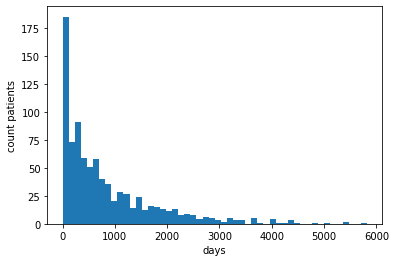

In [10]:
plt.hist(df_list['tos_list'], bins=50)
plt.xlabel('days')
plt.ylabel('count patients')

In [11]:
X = df_list.drop(['tos_list', 'deceased'], axis=1)
y = df_list[['tos_list', 'deceased']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(y_train.min(), y_train.max())

tos_list    0.0
deceased    0.0
dtype: float64 tos_list    5371.0
deceased       1.0
dtype: float64


Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 14/200
5/5 [===

5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 108/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 109/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 110/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 114/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 115/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 116/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: nan
Epoch 120/200

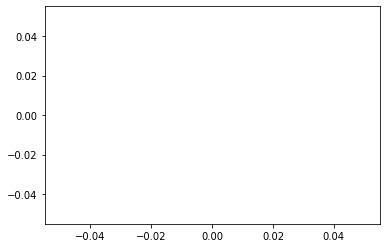

In [12]:
model = SurvivalNN(len(X.iloc[0]), hidden=[256, 256])
model.compile(optimizer='Adam')
history = model.fit(X_train.astype('float32'), y_train.astype('float32'), batch_size=128, epochs=200, verbose=1)
print(model.summary())
plt.plot(history.history['loss'])
plt.show()

Text(0, 0.5, 'count patients')

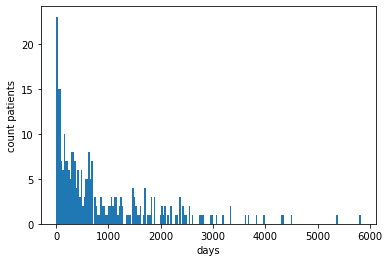

In [13]:
plt.hist(y_test['tos_list'], bins=200)
plt.xlabel('days')
plt.ylabel('count patients')

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

/home/fbaldo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/fbaldo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

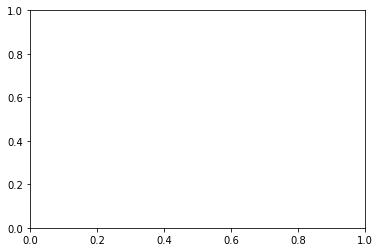

In [14]:
from scipy.special import expit
from scipy.stats import nbinom

logits = model.predict(X_test).ravel()
p = expit(logits)
print(1 - p)
dist = nbinom(1, 1-p)
plt.hist(dist.mean(), bins=200)
#plt.xlim(right=200)
plt.xlim(left=0)
plt.xlabel('days')
plt.ylabel('count patients')

In [ ]:
from sklearn.metrics import mutual_info_score
mutual_info_score(dist.mean(), y_test['tos_list'])

In [ ]:
import scipy 

def jensen_shannon_distance(p, q):
    """
    method to compute the Jenson-Shannon Distance 
    between two probability distributions
    """

    # convert the vectors into numpy arrays in case that they aren't
    p = np.array(p)
    q = np.array(q)

    # calculate m
    m = (p + q) / 2

    # compute Jensen Shannon Divergence
    divergence = (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)) / 2

    # compute the Jensen Shannon Distance
    distance = np.sqrt(divergence)

    return distance

In [ ]:
jensen_shannon_distance(dist.mean(), y_test['tos_list'])

In [ ]:
from lifelines.statistics import logrank_test
logrank_test(dist.mean(), y_test['tos_list'])